# Milestone 1 Simulation Notebook
- This is the same notebook we used for Milestone 1, except we're now using a simulated robot. Everything else is essentially the real software than ran on the robot (except we're not using an actual camera).
- We can primarily use this notebook to test how our TentaclePlanner / Orchestrator works without a real robot. This can be extended to the camera functionality in future too.

In [6]:

import time
import numpy as np
import warnings
from matplotlib import pyplot as plt
from matplotlib.patches import Arrow
from IPython import display
import cv2
import threading
import random


In [7]:
from robot_core.hardware.pin_config import *
from robot_core.hardware.simulated_diff_drive_robot import DiffDriveRobot
from robot_core.control.PI_controller import PIController
from robot_core.perception.opencv_detector import TennisBallDetector
from robot_core.motion.tentacle_planner import TentaclePlanner
from robot_core.orchestration.orchestrator import Orchestrator
from robot_core.utils.update_plot import update_plot


In [8]:
orchestrator = Orchestrator()


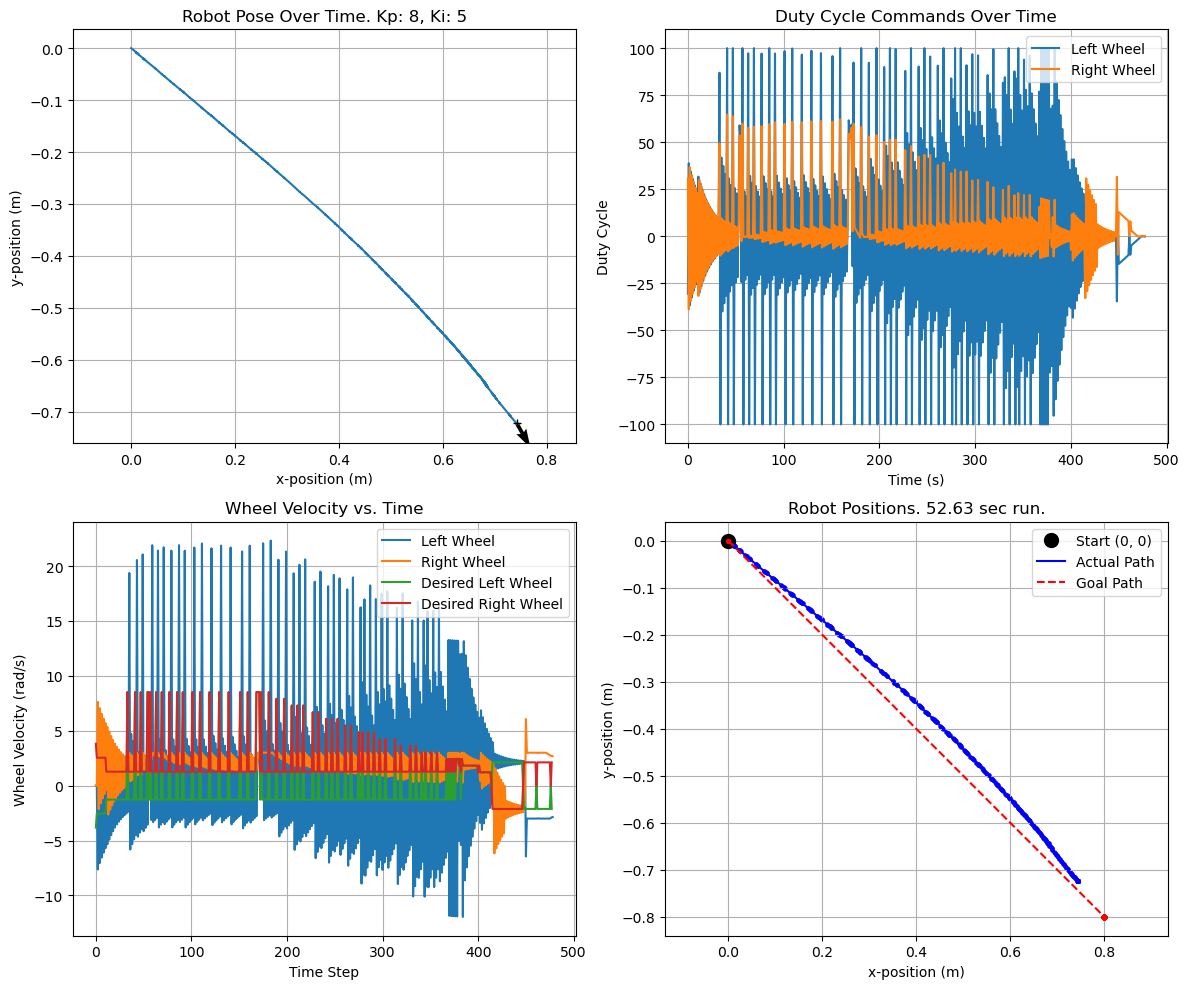

In [9]:
orchestrator.start(
    robot=DiffDriveRobot(0.05, real_time=True), 
    controller=PIController(real_time=True), 
    planner=TentaclePlanner(), 
    detector=TennisBallDetector(simulate=True)
)


# Set up the plot
%matplotlib inline
plt.ion()  # Turn on interactive mode

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Main loop for updating the plot
try:
    while True:
        update_plot(orchestrator, fig, axes, clear_output=False)
        time.sleep(5)  # Update plot every 3 seconds
        # pass
except KeyboardInterrupt:
    print("Stopping the simulation...")
finally:
    orchestrator.stop()
    update_plot(orchestrator, fig, axes)
    # plt.close(fig)


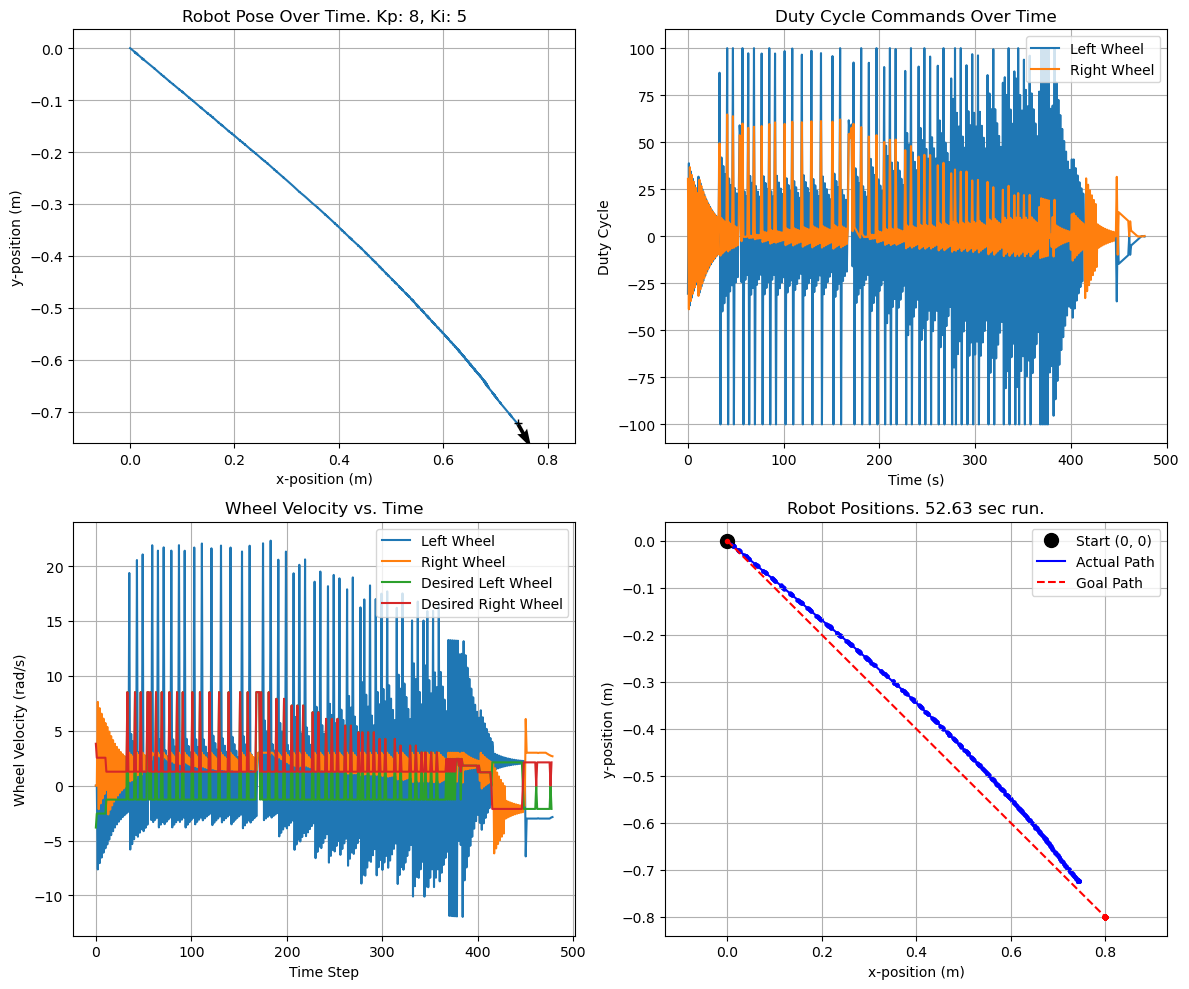

In [10]:
# To regenerate the plot in a nice way, run this cell:
%matplotlib inline
plt.ion()  # Turn on interactive mode

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
update_plot(orchestrator, fig, axes)